In [1]:
# 1) Imports & Data Loading


# Standard imports
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Modeling & preprocessing
from sklearn.model_selection import train_test_split, StratifiedKFold
from sklearn.preprocessing import StandardScaler, OneHotEncoder, OrdinalEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer
from sklearn.metrics import accuracy_score, roc_auc_score, classification_report, confusion_matrix, precision_recall_curve
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier

In [2]:
# Load dataset
df = pd.read_csv(r"C:\Users\Admin\Desktop\credit_risk_10000_with_new.csv")

# Preview data
df.head(20)


,Customer_ID,Credit_Utilization_Ratio,Debt_to_Income_Ratio,Loan_Purpose,Default_Status,Payment_History,Employment_Status,Income_Details,Previous_Loans,Loan_Amount,Term_Length(months),Demographic_Data,Age
0,CUST_00001,0.44,0.81,Auto,No,724.835708,Self-Employed,6301360.0,2.0,684999.0,24.0,Urban,25.0
1,CUST_00002,0.96,0.73,Personal,No,NaN,Employed,2634337.0,2.0,1897214.0,60.0,Suburban,39.0
2,CUST_00003,0.76,0.43,Business,No,1098.576640,Employed,4756232.0,1.0,1903937.0,12.0,Urban,42.0
3,CUST_00004,0.64,1.25,Business,No,776.151493,Unemployed,4123191.0,4.0,1239688.0,12.0,Rural,39.0
4,CUST_00005,0.24,1.01,Education,No,688.292331,Employed,3957938.0,1.0,564151.0,24.0,Urban,32.0
5,CUST_00006,0.24,1.74,Home,No,688.293152,Unemployed,6235790.0,1.0,793978.0,24.0,Rural,36.0
6,CUST_00007,0.15,0.16,Education,No,778.960641,NaN,NaN,0.0,1513422.0,60.0,Suburban,38.0
7,CUST_00008,0.88,1.32,Home,Yes,738.371736,Employed,5567225.0,2.0,1725155.0,48.0,Urban,39.0
8,CUST_00009,0.64,1.55,Education,Yes,676.526281,Employed,1723827.0,2.0,1852809.0,24.0,Rural,58.0
9,CUST_00010,0.74,1.54,Education,Yes,727.128002,Self-Employed,3662209.0,4.0,615113.0,24.0,Urban,39.0


In [3]:
# 2) Exploratory Data Analysis (EDA)
#--- Missing values per column ---'
print(df.isnull().sum())


Customer_ID                    0
Credit_Utilization_Ratio     496
Debt_to_Income_Ratio         494
Loan_Purpose                 500
Default_Status                 0
Payment_History              998
Employment_Status           1016
Income_Details              1016
Previous_Loans               996
Loan_Amount                  933
Term_Length(months)          933
Demographic_Data            1007
Age                         1007
dtype: int64


In [4]:
print(df.dtypes)

Customer_ID                  object
Credit_Utilization_Ratio    float64
Debt_to_Income_Ratio        float64
Loan_Purpose                 object
Default_Status               object
Payment_History             float64
Employment_Status            object
Income_Details              float64
Previous_Loans              float64
Loan_Amount                 float64
Term_Length(months)         float64
Demographic_Data             object
Age                         float64
dtype: object


In [5]:
# Handle missing numerical values using median
df['Credit_Utilization_Ratio'].fillna(df['Credit_Utilization_Ratio'].median(), inplace=True)
df['Debt_to_Income_Ratio'].fillna(df['Debt_to_Income_Ratio'].median(), inplace=True)
df['Payment_History'].fillna(df['Payment_History'].median(), inplace=True)
df['Income_Details'].fillna(df['Income_Details'].median(), inplace=True)
df['Previous_Loans'].fillna(df['Previous_Loans'].median(), inplace=True)
df['Loan_Amount'].fillna(df['Loan_Amount'].median(), inplace=True)
df['Age'].fillna(df['Age'].median(), inplace=True)
df['Term_Length(months)'].fillna(df['Term_Length(months)'].median(), inplace=True)

# Handle missing categorical values using mode
df['Loan_Purpose'].fillna(df['Loan_Purpose'].mode()[0], inplace=True)
df['Employment_Status'].fillna(df['Employment_Status'].mode()[0], inplace=True)
df['Demographic_Data'].fillna(df['Demographic_Data'].mode()[0], inplace=True)

	


# Verify missing values again
df.isnull().sum()


Customer_ID                 0
Credit_Utilization_Ratio    0
Debt_to_Income_Ratio        0
Loan_Purpose                0
Default_Status              0
Payment_History             0
Employment_Status           0
Income_Details              0
Previous_Loans              0
Loan_Amount                 0
Term_Length(months)         0
Demographic_Data            0
Age                         0
dtype: int64

In [6]:

# Basic numeric summary
num_cols = ['Payment_History','Income_Details','Previous_Loans','Loan_Amount','Term_Length(months)','Age',
            'Credit_Utilization_Ratio','Debt_to_Income_Ratio']
#--- Numeric summary (head) ---')
print(df[num_cols].describe().T)

                            count          mean           std           min  \
Payment_History           10000.0  7.099461e+02  7.564547e+01  5.038800e+02   
Income_Details            10000.0  4.809509e+06  1.977835e+06  1.803590e+05   
Previous_Loans            10000.0  2.444400e+00  3.680634e+00  0.000000e+00   
Loan_Amount               10000.0  1.344035e+06  8.828907e+05 -1.887337e+06   
Term_Length(months)       10000.0  3.591240e+01  1.610518e+01  1.200000e+01   
Age                       10000.0  4.091290e+01  1.350273e+01 -1.000000e+01   
Credit_Utilization_Ratio  10000.0  5.718653e-01  3.749898e-01  1.000000e-01   
Debt_to_Income_Ratio      10000.0  1.112624e+00  7.872204e-01  1.000000e-01   

                                   25%           50%           75%  \
Payment_History           6.718901e+02  7.017424e+02  7.329283e+02   
Income_Details            3.851345e+06  4.594838e+06  5.363273e+06   
Previous_Loans            1.000000e+00  2.000000e+00  3.000000e+00   
Loan_Amo

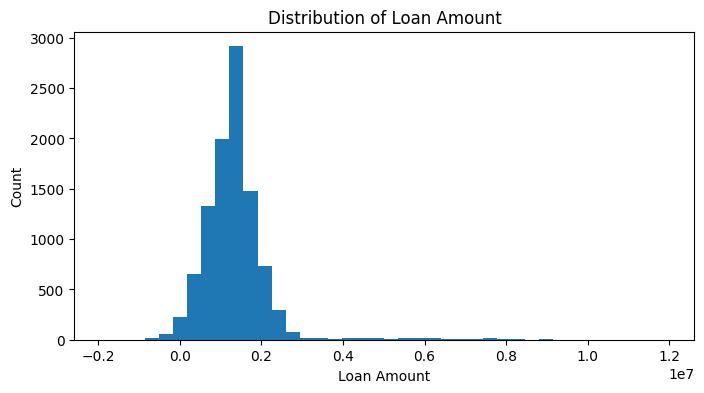

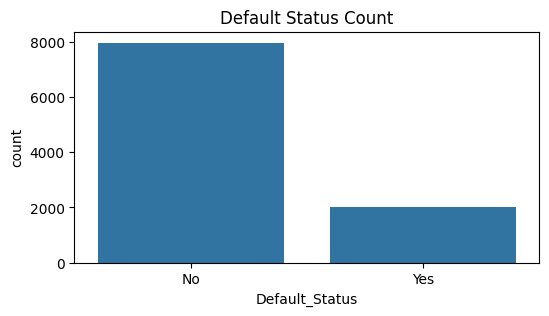

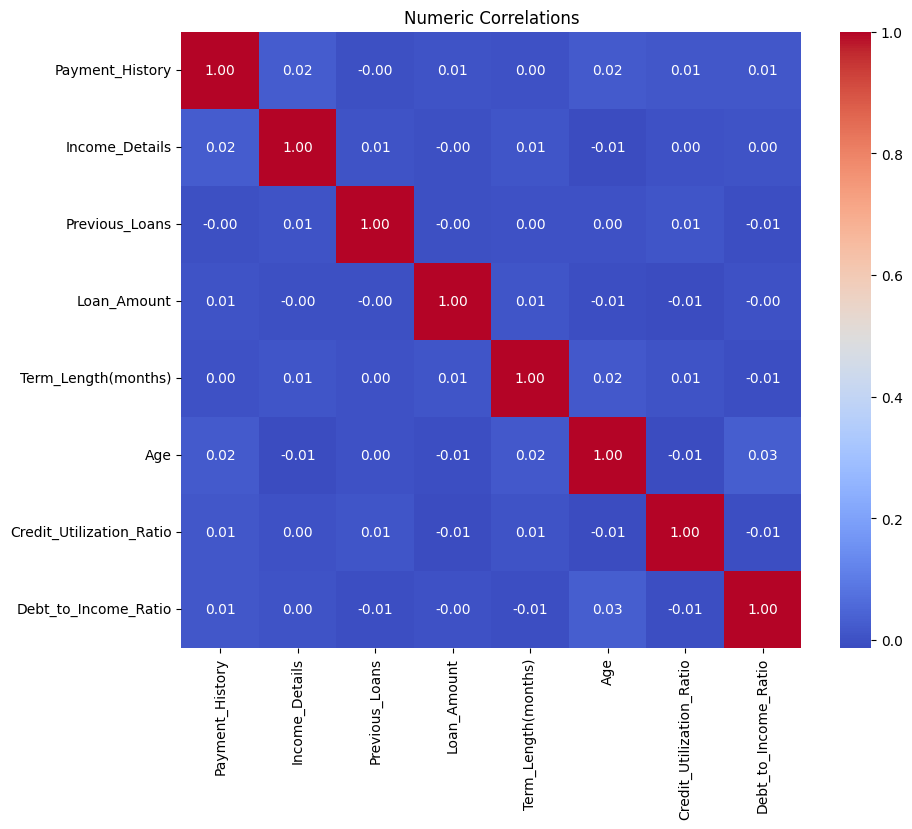

In [7]:

# Visual: distribution of Loan_Amount
plt.figure(figsize=(8,4))
plt.hist(df['Loan_Amount'].fillna(0), bins=40)
plt.title('Distribution of Loan Amount')
plt.xlabel('Loan Amount')
plt.ylabel('Count')
plt.show()

# Visual: Default balance
plt.figure(figsize=(6,3))
sns.countplot(x='Default_Status', data=df)
plt.title('Default Status Count')
plt.show()

# Check correlations among numeric features (helps steer feature engineering)
plt.figure(figsize=(10,8))
sns.heatmap(df[num_cols].corr(), annot=True, fmt='.2f', cmap='coolwarm')
plt.title('Numeric Correlations')
plt.show()

In [8]:
# 3) Advanced Feature Engineering


"""
Rationale & new features created below:
- Loan_to_Income_Ratio : higher => higher risk
- Log transformations for skewed money fields for linear-model friendliness
- Payment_History_bins : transform a numeric payment history into categories
- Delinquency_flag: derived if Payment_History below a threshold
- Credit_Stress_Score: composite score using Credit Utilization and Debt-to-Income
- Previous_Loans_count: keep as-is but also flag many_previous_loans
- Term bins, Age bins, Employment Stability features
- Interaction terms: LoanAmount * CreditUtilization, Loan_to_Income * Age
- Aggregated features: rolling if there were time series (not available here) - placeholder
"""

# Copy dataframe to avoid accidental modification
df_fe = df.copy()

# 3.1 Fill missing minimally for feature creation (we'll handle properly in pipeline later)
for col in num_cols:
    if col in df_fe.columns:
        df_fe[col] = df_fe[col].fillna(df_fe[col].median())

for col in ['Employment_Status','Demographic_Data','Loan_Purpose','Default_Status']:
    if col in df_fe.columns:
        df_fe[col] = df_fe[col].fillna(df_fe[col].mode()[0])


In [9]:

# 3.2 Basic derived features
# Loan to income ratio (safeguard zero income)
df_fe['Loan_to_Income_Ratio'] = df_fe['Loan_Amount'] / (df_fe['Income_Details'].replace(0, np.nan).fillna(1))

# Log transforms to reduce skew (add 1 to avoid log(0))
df_fe['Log_Loan_Amount'] = np.log1p(df_fe['Loan_Amount'])
df_fe['Log_Income'] = np.log1p(df_fe['Income_Details'])



C:\Users\Admin\AppData\Local\Programs\Python\Python314\Lib\site-packages\pandas\core\arraylike.py:399: RuntimeWarning: invalid value encountered in log1p
  result = getattr(ufunc, method)(*inputs, **kwargs)


In [10]:
# Payment history based features
# Assume Payment_History is numeric score where lower values indicate missed payments
# Create bins and a delinquency flag
if df_fe['Payment_History'].dtype.kind in 'biufc':
    df_fe['Payment_History_bin'] = pd.cut(df_fe['Payment_History'], bins=[-1,0,2,5,10,100], labels=['VeryPoor','Poor','Average','Good','Excellent'])
    df_fe['Delinquency_flag'] = (df_fe['Payment_History'] <= 2).astype(int)
else:
    # If it's categorical already, normalize labels
    df_fe['Payment_History_bin'] = df_fe['Payment_History'].astype(str)
    df_fe['Delinquency_flag'] = df_fe['Payment_History'].isin(['VeryPoor','Poor']).astype(int)



In [11]:
# Credit stress composite score (simple linear combination)
# normalize credit utilization and debt-to-income to 0-1 scale before combining
cmin = df_fe['Credit_Utilization_Ratio'].min(); cmax = df_fe['Credit_Utilization_Ratio'].max()
dmin = df_fe['Debt_to_Income_Ratio'].min(); dmax = df_fe['Debt_to_Income_Ratio'].max()

def normalize(series, a, b):
    if b - a == 0:
        return np.zeros_like(series)
    return (series - a) / (b - a)

norm_credit_util = normalize(df_fe['Credit_Utilization_Ratio'], cmin, cmax)
norm_debt_income = normalize(df_fe['Debt_to_Income_Ratio'], dmin, dmax)

In [12]:
# Weighted composite: more weight to utilization
df_fe['Credit_Stress_Score'] = 0.6 * norm_credit_util + 0.4 * norm_debt_income


In [13]:
# Previous loans flags
# Many previous loans might indicate repeat borrowing — flag if > median
median_prev = df_fe['Previous_Loans'].median()
df_fe['Many_Previous_Loans'] = (df_fe['Previous_Loans'] > median_prev).astype(int)



In [14]:
# Term_length bins and installment estimate
bins = [0,12,24,36,48,60,120]
labels = ['<=1yr','1-2yr','2-3yr','3-4yr','4-5yr','>5yr']
df_fe['Term_bin'] = pd.cut(df_fe['Term_Length(months)'], bins=bins, labels=labels)

df_fe['Installment_estimate'] = df_fe['Loan_Amount'] / (df_fe['Term_Length(months)'].replace(0,1))



In [15]:
# Age groups
df_fe['Age_Group'] = pd.cut(df_fe['Age'], bins=[15,25,35,50,65,100], labels=['<25','25-34','35-49','50-64','65+'])



In [16]:
# Interaction features
df_fe['LoanAmt_x_CreditUtil'] = df_fe['Loan_Amount'] * df_fe['Credit_Utilization_Ratio']
df_fe['Loan_to_Income_x_Age'] = df_fe['Loan_to_Income_Ratio'] * df_fe['Age']



In [17]:
# Rank features: percentile ranks within the dataset
for col in ['Loan_Amount','Income_Details','Credit_Utilization_Ratio','Debt_to_Income_Ratio']:
    df_fe[col + '_pct_rank'] = df_fe[col].rank(pct=True)



In [18]:
# Encode Payment_History_bin as a string category (keep original Payment_History too)
df_fe['Payment_History_bin'] = df_fe['Payment_History_bin'].astype(str)

# Show a sample of engineered features

print(df_fe[['Loan_to_Income_Ratio','Log_Loan_Amount','Delinquency_flag','Credit_Stress_Score','Many_Previous_Loans','Installment_estimate']].head())

   Loan_to_Income_Ratio  Log_Loan_Amount  Delinquency_flag  \
0              0.108707        13.437174                 0   
1              0.720187        14.455898                 0   
2              0.400304        14.459435                 0   
3              0.300662        14.030371                 0   
4              0.142537        13.243079                 0   

   Credit_Stress_Score  Many_Previous_Loans  Installment_estimate  
0             0.070651                    0          28541.625000  
1             0.131508                    0          31620.233333  
2             0.094711                    0         158661.416667  
3             0.113115                    1         103307.333333  
4             0.054095                    0          23506.291667  


In [19]:
# -----------------------------
# 4) Preprocessing, Encoding & Scaling (Pipeline)
# -----------------------------

"""
We build a sklearn Pipeline that handles:
- Imputation for numeric and categorical
- Encoding for categorical (one-hot or ordinal as appropriate)
- Scaling numeric features
This allows saving the pipeline and using it inside the Streamlit app.
"""

# Define features for modeling
target = 'Default_Status'
exclude_cols = ['Customer_ID']

# Identify final feature lists (drop target + metadata)
all_cols = [c for c in df_fe.columns if c not in exclude_cols]
all_cols.remove(target)



In [20]:
# Define numeric and categorical for pipeline
numeric_features = [c for c in all_cols if df_fe[c].dtype.kind in 'biufc' and c not in ['Payment_History']]
# keep Payment_History numeric as well if numeric
if 'Payment_History' in df_fe.columns and df_fe['Payment_History'].dtype.kind in 'biufc':
    numeric_features.append('Payment_History')

categorical_features = [c for c in all_cols if c not in numeric_features]

print(f"Numeric features for pipeline (sample): {numeric_features[:10]}")
print('Categorical features for pipeline (sample):', categorical_features[:10])




Numeric features for pipeline (sample): ['Credit_Utilization_Ratio', 'Debt_to_Income_Ratio', 'Income_Details', 'Previous_Loans', 'Loan_Amount', 'Term_Length(months)', 'Age', 'Loan_to_Income_Ratio', 'Log_Loan_Amount', 'Log_Income']
Categorical features for pipeline (sample): ['Loan_Purpose', 'Employment_Status', 'Demographic_Data', 'Payment_History_bin', 'Term_bin', 'Age_Group']


In [21]:
# Numeric transformer: median impute + standard scale
numeric_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='median')),
    ('scaler', StandardScaler())
])


In [22]:
#Categorical transformer: impute constant + one-hot encode
categorical_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='most_frequent')),
    ('onehot', OneHotEncoder(handle_unknown='ignore', sparse_output=False))
])

preprocessor = ColumnTransformer(
    transformers=[
        ('num', numeric_transformer, numeric_features),
        ('cat', categorical_transformer, categorical_features)
    ],
    remainder='drop'
)

In [23]:

# 5) Model Training & Cross-validation

# Prepare X, y
X = df_fe.drop(columns=exclude_cols + [target])
y = df_fe[target]

# If target is categorical string, convert to numeric labels
if y.dtype == 'O' or y.dtype.name == 'category':
    y = pd.factorize(y)[0]



In [24]:
# Categorical transformer: impute constant + one-hot encode
categorical_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='most_frequent')),
    ('onehot', OneHotEncoder(handle_unknown='ignore', sparse_output=False))
])

preprocessor = ColumnTransformer(
    transformers=[
        ('num', numeric_transformer, numeric_features),
        ('cat', categorical_transformer, categorical_features)
    ],
    remainder='drop'
)


In [25]:
# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

# Helper: function to train pipeline + model
from sklearn.base import clone

def train_model(model, X_train, y_train, X_test, y_test):
    """Trains a pipeline (preprocessor + model), returns fitted pipeline and metrics."""
    pipe = Pipeline(steps=[('preprocessor', preprocessor), ('model', model)])
    pipe.fit(X_train, y_train)
    preds = pipe.predict(X_test)
    probs = None
    try:
        probs = pipe.predict_proba(X_test)[:,1]
    except Exception:
        pass
    metrics = {
        'accuracy': accuracy_score(y_test, preds),
        'roc_auc': roc_auc_score(y_test, probs) if probs is not None else None,
        'classification_report': classification_report(y_test, preds)
    }
    return pipe, metrics

In [26]:
# 5.1 Logistic Regression
lr_model = LogisticRegression(max_iter=500)
pipe_lr, metrics_lr = train_model(lr_model, X_train, y_train, X_test, y_test)
print("\nLogistic Regression metrics:")
print(metrics_lr)




Logistic Regression metrics:
{'accuracy': 0.797, 'roc_auc': 0.49799605247881107, 'classification_report': '              precision    recall  f1-score   support\n\n           0       0.80      1.00      0.89      1595\n           1       0.00      0.00      0.00       405\n\n    accuracy                           0.80      2000\n   macro avg       0.40      0.50      0.44      2000\nweighted avg       0.64      0.80      0.71      2000\n'}


In [27]:
# 5.2 Random Forest
rf_model = RandomForestClassifier(n_estimators=200, random_state=42)
pipe_rf, metrics_rf = train_model(rf_model, X_train, y_train, X_test, y_test)

print("\nRandom Forest metrics:")
metrics_rf
#import pandas as pd

#rf_model = RandomForestClassifier(n_estimators=200, random_state=42)
#pipe_rf, metrics_rf = train_model(rf_model, X_train, y_train, X_test, y_test)

#print("\nRandom Forest metrics:")
#metrics_df = pd.DataFrame([pipe_rf,metrics_rf])
#print(metrics_df)



# To save the best model:
# joblib.dump(best[1], '/mnt/data/best_credit_model.joblib')
# print('Saved best model to /mnt/data/best_credit_model.joblib')




Random Forest metrics:


{'accuracy': 0.794,
 'roc_auc': 0.48424242424242425,
 'classification_report': '              precision    recall  f1-score   support\n\n           0       0.80      1.00      0.89      1595\n           1       0.00      0.00      0.00       405\n\n    accuracy                           0.79      2000\n   macro avg       0.40      0.50      0.44      2000\nweighted avg       0.64      0.79      0.71      2000\n'}

In [28]:
# -------------------------------------------------------------
# Build candidate model list (IMPORTANT)
# -------------------------------------------------------------
candidates = [
    ("Logistic Regression", pipe_lr, metrics_lr),
    ("Random Forest", pipe_rf, metrics_rf)
]

# -------------------------------------------------------------
# Determine best model by ROC_AUC (or accuracy if missing)
# -------------------------------------------------------------
best = None
best_score = -999

for name, pipe, metrics in candidates:
    score = metrics['roc_auc'] if metrics['roc_auc'] is not None else metrics['accuracy']
    if score is None:
        score = -999
    if score > best_score:
        best_score = score
        best = (name, pipe, metrics)

print(f"\nBest model by selected metric: {best[0]} with score {best_score}")


Best model by selected metric: Logistic Regression with score 0.49799605247881107


In [29]:
# 6) Model Explainability


# 6.1 Feature importances for tree-based models
if best[0] in ['rf','xgb']:
    # Retrieve feature names after preprocessing
    # This requires fitting the preprocessor separately to get feature names
    preprocessor.fit(X_train)
    # numeric feature names remain same, categorical produce n columns from OneHot
    num_names = numeric_features
    # Get categorical onehot column names
    cat_ohe = preprocessor.named_transformers_['cat'].named_steps['onehot']
    try:
        cat_names = cat_ohe.get_feature_names_out(categorical_features).tolist()
    except Exception:
        # older sklearn
        cat_names = cat_ohe.get_feature_names(categorical_features).tolist()
    feature_names = num_names + cat_names

    # extract tree model from pipeline
    tree_model = best[1].named_steps['model']
    try:
        importances = tree_model.feature_importances_
        fi = pd.Series(importances, index=feature_names).sort_values(ascending=False)
        print('Top 20 feature importances:')
        print(fi.head(20))
    except Exception as e:
        print('Could not extract feature importances:', e)



In [30]:
import pandas as pd
import numpy as np
import plotly.express as px
import plotly.graph_objects as go
from sklearn.metrics import roc_curve, confusion_matrix


In [31]:
#Model Comparison Table
results_df = pd.DataFrame([
    {
        "Model": name,
        "Accuracy": metrics["accuracy"],
        "ROC AUC": metrics["roc_auc"]
    }
    for name, pipe, metrics in candidates
])

results_df



,Model,Accuracy,ROC AUC
0,Logistic Regression,0.797,0.497996
1,Random Forest,0.794,0.484242


In [32]:
# Auto-detect preprocessor
preprocess_key = [k for k, v in pipe_rf.named_steps.items() if "transform" in str(type(v)).lower() or "column" in k][0]

# Auto-detect classifier
model_key = [k for k, v in pipe_rf.named_steps.items() if "classifier" in str(type(v)).lower()][0]

# Get importances
importances = pipe_rf.named_steps[model_key].feature_importances_

# Extract feature names
num_features = numeric_features

cat_transformer = pipe_rf.named_steps[preprocess_key] \
                        .named_transformers_['cat'] \
                        .named_steps['onehot']

cat_features = cat_transformer.get_feature_names_out(categorical_features)

# Combine
full_feature_names = list(num_features) + list(cat_features)

# Create DF
fi_df = pd.DataFrame({
    "Feature": full_feature_names,
    "Importance": importances
}).sort_values("Importance", ascending=False)


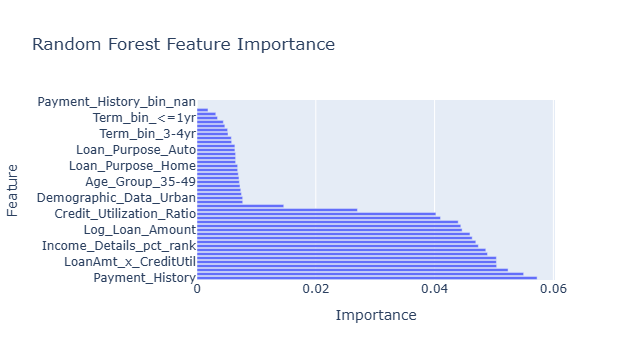

In [33]:
import plotly.express as px

px.bar(fi_df,
       x="Importance",
       y="Feature",
       title="Random Forest Feature Importance",
       orientation="h")

In [34]:
pipe_rf.named_steps

{'preprocessor': ColumnTransformer(transformers=[('num',
                                  Pipeline(steps=[('imputer',
                                                   SimpleImputer(strategy='median')),
                                                  ('scaler', StandardScaler())]),
                                  ['Credit_Utilization_Ratio',
                                   'Debt_to_Income_Ratio', 'Income_Details',
                                   'Previous_Loans', 'Loan_Amount',
                                   'Term_Length(months)', 'Age',
                                   'Loan_to_Income_Ratio', 'Log_Loan_Amount',
                                   'Log_Income', 'Delinquency_flag',
                                   'Credit_Stress_Score...
                                   'Income_Details_pct_rank',
                                   'Credit_Utilization_Ratio_pct_rank',
                                   'Debt_to_Income_Ratio_pct_rank',
                                

In [35]:
# 1. Extract numeric and categorical transformers
num_features = numeric_features
cat_pipeline = pipe_rf.named_steps['preprocessor'].named_transformers_['cat']
onehot = cat_pipeline.named_steps['onehot']

# 2. Get transformed categorical feature names
cat_features = onehot.get_feature_names_out(categorical_features)

# 3. Combine numeric + categorical features
full_feature_names = list(num_features) + list(cat_features)

# 4. Extract feature importances from Random Forest
importances = pipe_rf.named_steps['model'].feature_importances_

# 5. Build dataframe
fi_df = pd.DataFrame({
    "Feature": full_feature_names,
    "Importance": importances
}).sort_values("Importance", ascending=False)

fi_df.head(20)


,Feature,Importance
20,Payment_History,0.057257
11,Credit_Stress_Score,0.054992
15,Loan_to_Income_x_Age,0.052369
1,Debt_to_Income_Ratio,0.050448
14,LoanAmt_x_CreditUtil,0.050408
13,Installment_estimate,0.050404
7,Loan_to_Income_Ratio,0.048908
19,Debt_to_Income_Ratio_pct_rank,0.048619
17,Income_Details_pct_rank,0.047367
2,Income_Details,0.046939


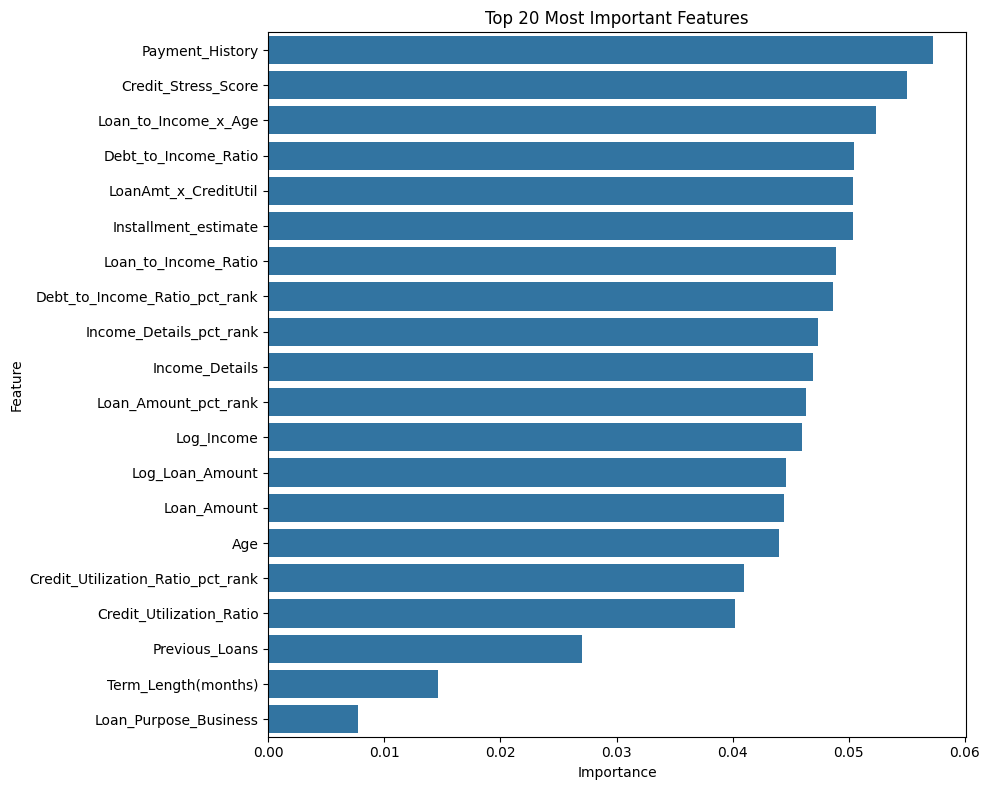

In [36]:
top20 = fi_df.head(20)

plt.figure(figsize=(10, 8))
sns.barplot(
    data=top20,
    x="Importance",
    y="Feature",
    orient="h"
)
plt.title("Top 20 Most Important Features")
plt.tight_layout()
plt.show()


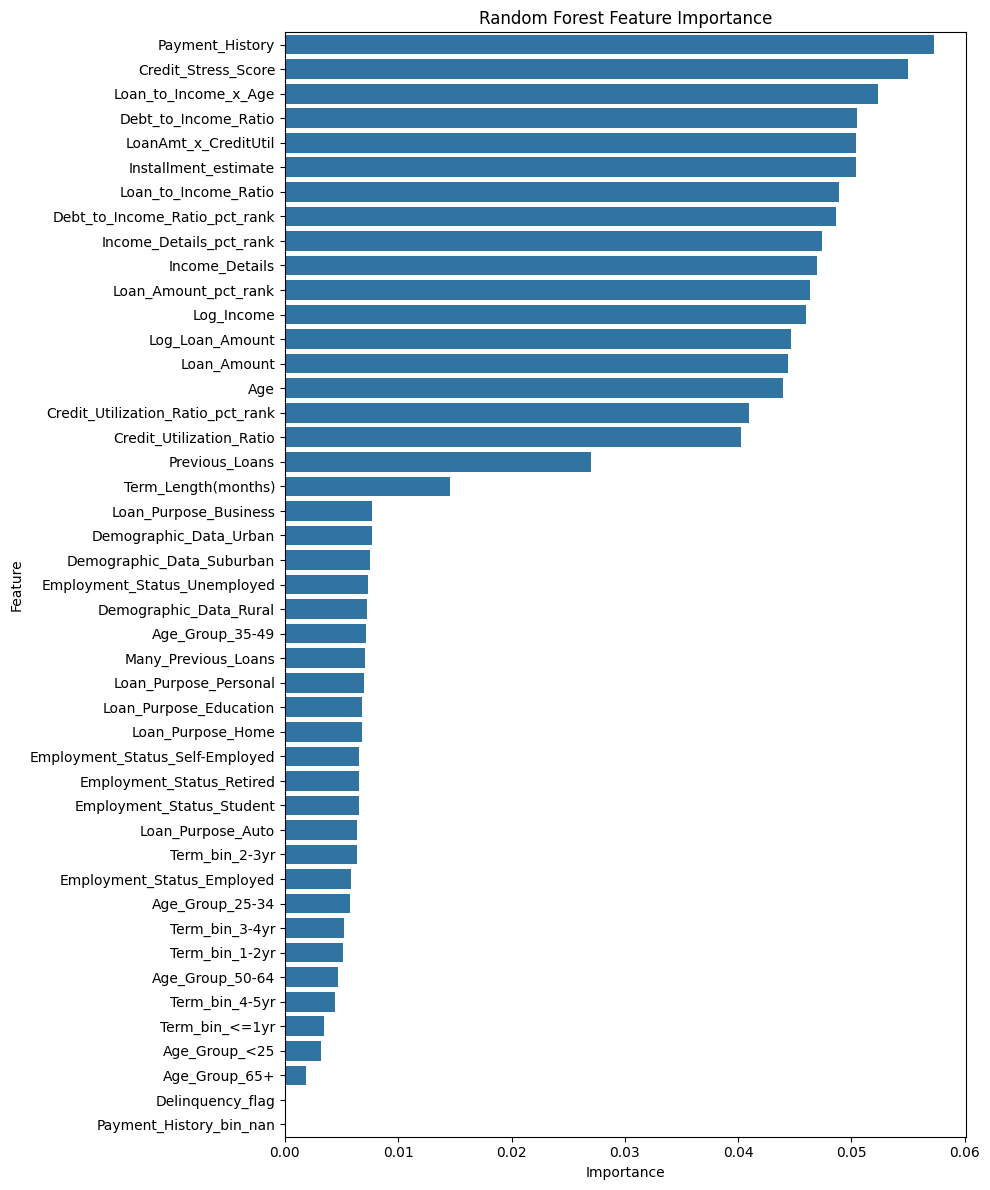

In [37]:
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 12))
sns.barplot(
    data=fi_df,
    x="Importance",
    y="Feature",
    orient="h"
)
plt.title("Random Forest Feature Importance")
plt.xlabel("Importance")
plt.ylabel("Feature")
plt.tight_layout()
plt.show()


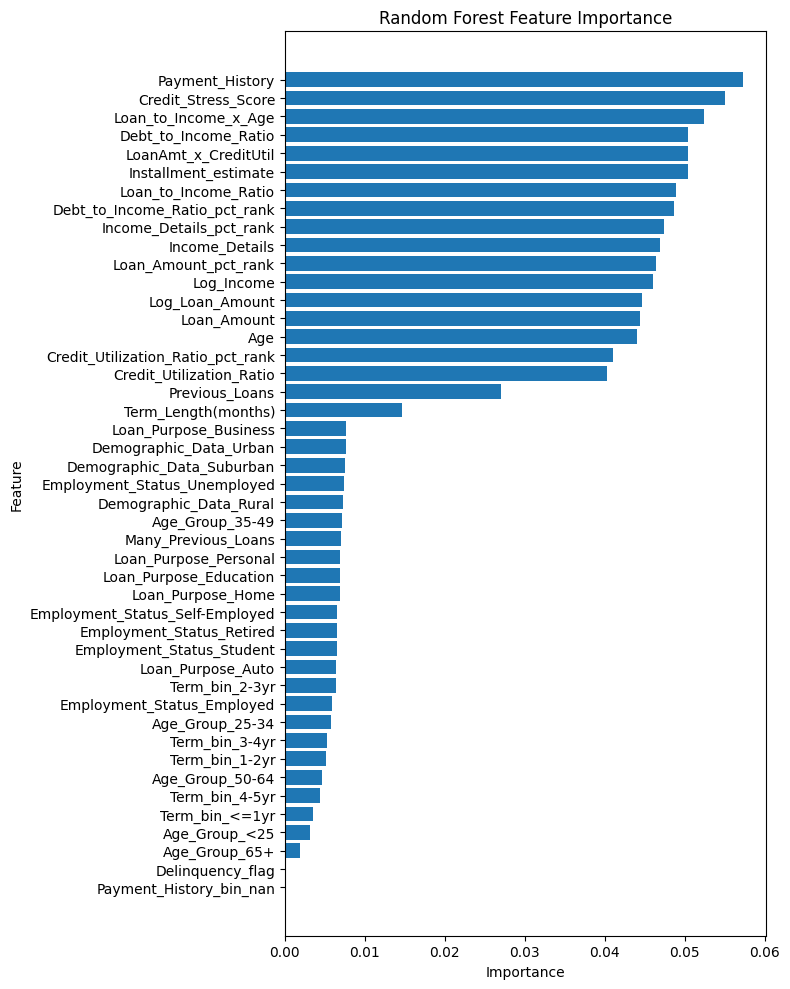

In [38]:
import matplotlib.pyplot as plt

plt.figure(figsize=(8, 10))
plt.barh(fi_df["Feature"], fi_df["Importance"])
plt.xlabel("Importance")
plt.ylabel("Feature")
plt.title("Random Forest Feature Importance")
plt.gca().invert_yaxis()   # Highest importance on top
plt.tight_layout()
plt.show()